## Problem Statement
Using the latest data, perform analysis for batsmen against CSK at Chepauk in the middle overs. Use MCDM and Saaty scale to come up with batsmen score


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv('all_matches.csv')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                260920 non-null  int64  
 1   season                  260920 non-null  object 
 2   start_date              260920 non-null  object 
 3   venue                   260920 non-null  object 
 4   innings                 260920 non-null  int64  
 5   ball                    260920 non-null  float64
 6   batting_team            260920 non-null  object 
 7   bowling_team            260920 non-null  object 
 8   striker                 260920 non-null  object 
 9   non_striker             260920 non-null  object 
 10  bowler                  260920 non-null  object 
 11  runs_off_bat            260920 non-null  int64  
 12  extras                  260920 non-null  int64  
 13  wides                   8381 non-null    float64
 14  noballs             

In [123]:
df['wicket_type'].value_counts()

,count
wicket_type,
caught,8063
bowled,2212
run out,1114
lbw,800
caught and bowled,367
stumped,358
retired hurt,15
hit wicket,15
obstructing the field,3


# #Fields required

Batsman, runs, fours, sixes, innings, dismissal, RPI, Strike Rate, BPD, dot percentage.

RPI - Runs per innings
BPD - Balls per dismissal

We have to generate this from a table that has data of all the balls bowled in IPL

In [125]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,9.5,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,VR Iyer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260916,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,9.6,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260917,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.1,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260918,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.2,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,VR Iyer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
dfCopy = df.copy()
dfCopy['one'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
dfCopy['two'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
dfCopy['three'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
dfCopy['four'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
dfCopy['six'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
dfCopy['dot'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)

In [127]:
dfCopy[['over done', 'ball no']] = df['ball'].astype('string').str.split('.', n=1, expand=True)

In [128]:
def getphase(over_done):
    if over_done <= 5:
        return 'powerplay'
    elif over_done <=14:
        return 'middle'
    else:
        return 'end'


In [129]:
dfCopy['phase'] = dfCopy['over done'].astype('int').apply(getphase)

In [130]:
dfCopy

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,other_player_dismissed,one,two,three,four,six,dot,over done,ball no,phase
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,0,0,0,0,0,1,0,1,powerplay
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,0,0,0,0,0,1,0,2,powerplay
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,0,0,0,0,0,1,0,3,powerplay
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,0,0,0,0,0,1,0,4,powerplay
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,0,0,0,0,0,1,0,5,powerplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,9.5,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,VR Iyer,...,NaN,1,0,0,0,0,0,9,5,middle
260916,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,9.6,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,...,NaN,1,0,0,0,0,0,9,6,middle
260917,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.1,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,...,NaN,1,0,0,0,0,0,10,1,middle
260918,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.2,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,VR Iyer,...,NaN,1,0,0,0,0,0,10,2,middle


In [131]:
venue_names = ['MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai']

dfCopy = dfCopy[dfCopy['venue'].apply(lambda x:x in venue_names)]
dfCopy = dfCopy[dfCopy['bowling_team'] == 'Chennai Super Kings']
dfCopy = dfCopy[dfCopy['phase'] == 'middle']

In [132]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3958 entries, 1789 to 258395
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                3958 non-null   int64  
 1   season                  3958 non-null   object 
 2   start_date              3958 non-null   object 
 3   venue                   3958 non-null   object 
 4   innings                 3958 non-null   int64  
 5   ball                    3958 non-null   float64
 6   batting_team            3958 non-null   object 
 7   bowling_team            3958 non-null   object 
 8   striker                 3958 non-null   object 
 9   non_striker             3958 non-null   object 
 10  bowler                  3958 non-null   object 
 11  runs_off_bat            3958 non-null   int64  
 12  extras                  3958 non-null   int64  
 13  wides                   112 non-null    float64
 14  noballs                 12 non-null     

In [133]:
df_runs = dfCopy.groupby('striker')['runs_off_bat'].sum().reset_index()
df_runs.rename(columns={'runs_off_bat':'runs'}, inplace=True)
df_runs.rename(columns={'striker':'batsman'}, inplace=True)
df_runs

,batsman,runs
0,A Badoni,5
1,A Mishra,16
2,A Mithun,11
3,A Raghuvanshi,0
4,A Symonds,27
...,...,...
170,YBK Jaiswal,0
171,YK Pathan,29
172,YS Chahal,4
173,Yuvraj Singh,66


In [134]:
type(df_runs)

pandas.core.frame.DataFrame

In [135]:
fours = dfCopy.groupby('striker')['four'].sum().reset_index()
fours.rename(columns={'four':'fours'}, inplace=True)
fours.rename(columns={'striker':'batsman'}, inplace=True)
fours

,batsman,fours
0,A Badoni,0
1,A Mishra,2
2,A Mithun,2
3,A Raghuvanshi,0
4,A Symonds,2
...,...,...
170,YBK Jaiswal,0
171,YK Pathan,1
172,YS Chahal,0
173,Yuvraj Singh,5


In [136]:
total = pd.merge(df_runs, fours, on='batsman', how='left')
total

,batsman,runs,fours
0,A Badoni,5,0
1,A Mishra,16,2
2,A Mithun,11,2
3,A Raghuvanshi,0,0
4,A Symonds,27,2
...,...,...,...
170,YBK Jaiswal,0,0
171,YK Pathan,29,1
172,YS Chahal,4,0
173,Yuvraj Singh,66,5


In [137]:
sixes = dfCopy.groupby('striker')['six'].sum().reset_index()
sixes.rename(columns={'six':'sixes'}, inplace=True)
sixes.rename(columns={'striker':'batsman'}, inplace=True)
sixes

,batsman,sixes
0,A Badoni,0
1,A Mishra,0
2,A Mithun,0
3,A Raghuvanshi,0
4,A Symonds,1
...,...,...
170,YBK Jaiswal,0
171,YK Pathan,1
172,YS Chahal,0
173,Yuvraj Singh,2


In [138]:
total = pd.merge(total, sixes, on='batsman', how='left')
total

,batsman,runs,fours,sixes
0,A Badoni,5,0,0
1,A Mishra,16,2,0
2,A Mithun,11,2,0
3,A Raghuvanshi,0,0,0
4,A Symonds,27,2,1
...,...,...,...,...
170,YBK Jaiswal,0,0,0
171,YK Pathan,29,1,1
172,YS Chahal,4,0,0
173,Yuvraj Singh,66,5,2


In [139]:
total.sort_values(by=['runs'], ascending=False)

,batsman,runs,fours,sixes
161,V Kohli,192,11,6
66,JH Kallis,124,10,1
152,SR Watson,121,9,7
143,SE Marsh,104,8,7
39,DA Warner,104,2,4
...,...,...,...,...
148,SO Hetmyer,0,0,0
34,CH Morris,0,0,0
160,UT Yadav,0,0,0
54,GJ Bailey,0,0,0


In [140]:
innings = dfCopy.groupby('striker')['match_id'].nunique().reset_index()

In [141]:
innings.rename(columns={'match_id':'innings'}, inplace=True)
innings.rename(columns={'striker':'batsman'}, inplace=True)
innings

,batsman,innings
0,A Badoni,1
1,A Mishra,2
2,A Mithun,1
3,A Raghuvanshi,1
4,A Symonds,1
...,...,...
170,YBK Jaiswal,1
171,YK Pathan,4
172,YS Chahal,1
173,Yuvraj Singh,4


In [142]:
total = pd.merge(total, innings, on='batsman', how='left')

In [143]:
dfCopy['wicket_type']

,wicket_type
1789,NaN
1790,NaN
1791,NaN
1792,NaN
1793,NaN
...,...
258391,caught
258392,NaN
258393,NaN
258394,NaN


In [144]:
total['RPI'] = total['runs']/total['innings']

In [145]:
total.sort_values(by=['runs'], ascending = False)

,batsman,runs,fours,sixes,innings,RPI
161,V Kohli,192,11,6,8,24.000000
66,JH Kallis,124,10,1,5,24.800000
152,SR Watson,121,9,7,4,30.250000
143,SE Marsh,104,8,7,3,34.666667
39,DA Warner,104,2,4,4,26.000000
...,...,...,...,...,...,...
148,SO Hetmyer,0,0,0,1,0.000000
34,CH Morris,0,0,0,1,0.000000
160,UT Yadav,0,0,0,1,0.000000
54,GJ Bailey,0,0,0,1,0.000000


In [146]:
balls = dfCopy.groupby('striker', as_index=False)['match_id'].count()
balls.rename(columns={'match_id':'balls'}, inplace=True)
balls.rename(columns={'striker':'batsman'}, inplace=True)
balls

,batsman,balls
0,A Badoni,5
1,A Mishra,22
2,A Mithun,8
3,A Raghuvanshi,1
4,A Symonds,27
...,...,...
170,YBK Jaiswal,3
171,YK Pathan,35
172,YS Chahal,12
173,Yuvraj Singh,58


In [147]:
balls

,batsman,balls
0,A Badoni,5
1,A Mishra,22
2,A Mithun,8
3,A Raghuvanshi,1
4,A Symonds,27
...,...,...
170,YBK Jaiswal,3
171,YK Pathan,35
172,YS Chahal,12
173,Yuvraj Singh,58


In [148]:
total = pd.merge(total, balls, on='batsman', how='left')

In [149]:
total

,batsman,runs,fours,sixes,innings,RPI,balls
0,A Badoni,5,0,0,1,5.00,5
1,A Mishra,16,2,0,2,8.00,22
2,A Mithun,11,2,0,1,11.00,8
3,A Raghuvanshi,0,0,0,1,0.00,1
4,A Symonds,27,2,1,1,27.00,27
...,...,...,...,...,...,...,...
170,YBK Jaiswal,0,0,0,1,0.00,3
171,YK Pathan,29,1,1,4,7.25,35
172,YS Chahal,4,0,0,1,4.00,12
173,Yuvraj Singh,66,5,2,4,16.50,58


In [150]:
def ballsPerBoundary(balls, boundary):
    if boundary == 0:
        return balls
    else:
        return balls/boundary

In [151]:
total['SR'] = total['runs']*100/total['balls']
total['BPB'] = total.apply(lambda x: ballsPerBoundary(x['balls'], x['fours']+x['sixes']), axis=1)


In [152]:
dot = dfCopy.groupby('striker')['dot'].sum().reset_index()
dot.rename(columns={'dot':'dot_balls'}, inplace=True)
dot.rename(columns={'striker':'batsman'}, inplace=True)
dot

,batsman,dot_balls
0,A Badoni,1
1,A Mishra,13
2,A Mithun,3
3,A Raghuvanshi,1
4,A Symonds,12
...,...,...
170,YBK Jaiswal,3
171,YK Pathan,16
172,YS Chahal,10
173,Yuvraj Singh,22


In [153]:
 total = pd.merge(total, dot, on='batsman', how='left')

In [154]:
total

,batsman,runs,fours,sixes,innings,RPI,balls,SR,BPB,dot_balls
0,A Badoni,5,0,0,1,5.00,5,100.000000,5.000000,1
1,A Mishra,16,2,0,2,8.00,22,72.727273,11.000000,13
2,A Mithun,11,2,0,1,11.00,8,137.500000,4.000000,3
3,A Raghuvanshi,0,0,0,1,0.00,1,0.000000,1.000000,1
4,A Symonds,27,2,1,1,27.00,27,100.000000,9.000000,12
...,...,...,...,...,...,...,...,...,...,...
170,YBK Jaiswal,0,0,0,1,0.00,3,0.000000,3.000000,3
171,YK Pathan,29,1,1,4,7.25,35,82.857143,17.500000,16
172,YS Chahal,4,0,0,1,4.00,12,33.333333,12.000000,10
173,Yuvraj Singh,66,5,2,4,16.50,58,113.793103,8.285714,22


In [155]:
total['DP'] = total['dot_balls']*100/total['balls']


In [156]:
total

,batsman,runs,fours,sixes,innings,RPI,balls,SR,BPB,dot_balls,DP
0,A Badoni,5,0,0,1,5.00,5,100.000000,5.000000,1,20.000000
1,A Mishra,16,2,0,2,8.00,22,72.727273,11.000000,13,59.090909
2,A Mithun,11,2,0,1,11.00,8,137.500000,4.000000,3,37.500000
3,A Raghuvanshi,0,0,0,1,0.00,1,0.000000,1.000000,1,100.000000
4,A Symonds,27,2,1,1,27.00,27,100.000000,9.000000,12,44.444444
...,...,...,...,...,...,...,...,...,...,...,...
170,YBK Jaiswal,0,0,0,1,0.00,3,0.000000,3.000000,3,100.000000
171,YK Pathan,29,1,1,4,7.25,35,82.857143,17.500000,16,45.714286
172,YS Chahal,4,0,0,1,4.00,12,33.333333,12.000000,10,83.333333
173,Yuvraj Singh,66,5,2,4,16.50,58,113.793103,8.285714,22,37.931034


In [157]:
players_dismissed = dfCopy['player_dismissed'].value_counts().reset_index()
players_dismissed.rename(columns={'player_dismissed':'batsman', 'count': 'dismissed'}, inplace=True)
players_dismissed

,batsman,dismissed
0,V Kohli,5
1,RV Uthappa,4
2,KD Karthik,4
3,DA Miller,3
4,KH Pandya,3
...,...,...
111,DH Yagnik,1
112,AM Rahane,1
113,AJ Finch,1
114,SM Pollock,1


In [158]:
total = pd.merge(total, players_dismissed, on='batsman', how='left')

In [159]:
total.dismissed.fillna(0, inplace=True)

In [160]:
def ballsPerDismissal(balls, dismissal):
    if dismissal == 0:
        return balls
    else:
        return balls/dismissal

In [161]:
total['BPD'] = total.apply(lambda x: ballsPerDismissal(x['balls'], x['dismissed']), axis=1)
total

,batsman,runs,fours,sixes,innings,RPI,balls,SR,BPB,dot_balls,DP,dismissed,BPD
0,A Badoni,5,0,0,1,5.00,5,100.000000,5.000000,1,20.000000,0.0,5.0
1,A Mishra,16,2,0,2,8.00,22,72.727273,11.000000,13,59.090909,1.0,22.0
2,A Mithun,11,2,0,1,11.00,8,137.500000,4.000000,3,37.500000,1.0,8.0
3,A Raghuvanshi,0,0,0,1,0.00,1,0.000000,1.000000,1,100.000000,1.0,1.0
4,A Symonds,27,2,1,1,27.00,27,100.000000,9.000000,12,44.444444,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,YBK Jaiswal,0,0,0,1,0.00,3,0.000000,3.000000,3,100.000000,1.0,3.0
171,YK Pathan,29,1,1,4,7.25,35,82.857143,17.500000,16,45.714286,2.0,17.5
172,YS Chahal,4,0,0,1,4.00,12,33.333333,12.000000,10,83.333333,1.0,12.0
173,Yuvraj Singh,66,5,2,4,16.50,58,113.793103,8.285714,22,37.931034,2.0,29.0


In [162]:
total.sort_values(by=['runs'], ascending=False)

,batsman,runs,fours,sixes,innings,RPI,balls,SR,BPB,dot_balls,DP,dismissed,BPD
161,V Kohli,192,11,6,8,24.000000,164,117.073171,9.647059,54,32.926829,5.0,32.8
66,JH Kallis,124,10,1,5,24.800000,124,100.000000,11.272727,39,31.451613,2.0,62.0
152,SR Watson,121,9,7,4,30.250000,70,172.857143,4.375000,16,22.857143,2.0,35.0
143,SE Marsh,104,8,7,3,34.666667,54,192.592593,3.600000,10,18.518519,2.0,27.0
39,DA Warner,104,2,4,4,26.000000,96,108.333333,16.000000,32,33.333333,3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,SO Hetmyer,0,0,0,1,0.000000,2,0.000000,2.000000,2,100.000000,1.0,2.0
34,CH Morris,0,0,0,1,0.000000,1,0.000000,1.000000,1,100.000000,1.0,1.0
160,UT Yadav,0,0,0,1,0.000000,3,0.000000,3.000000,3,100.000000,0.0,3.0
54,GJ Bailey,0,0,0,1,0.000000,1,0.000000,1.000000,1,100.000000,1.0,1.0


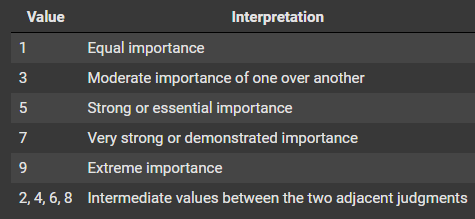

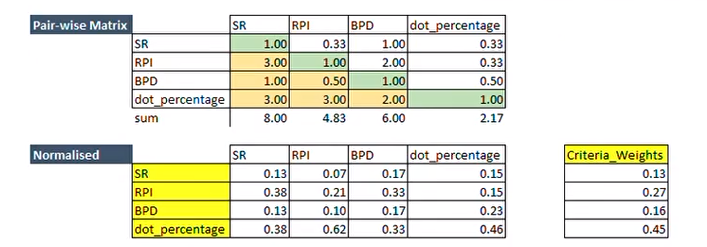

RPI is moderately important over SR, Balls Per Dismissal, is equally important as SR. Dot percentage is more important than strike rate. This is all on the basis of the fact that during middle overs it is important to score runs without losing wicket and it is important to keep rotating strike.

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
total['SRC'] = total['SR'].values
total['RPIC'] = total['RPI'].values
total['BPDC'] = total['BPD'].values
total['DPC'] = total['DP'].values
columns = ['SRC','RPIC', 'BPDC','DPC']

totalnp = scaler.fit_transform(total[columns])
total[columns] = pd.DataFrame(totalnp, columns=columns)


In [164]:
pip install topsispy
# Using a library to do the topsis method

In [165]:
import topsispy as tp
evaluation_matrix = total[columns].values
evaluation_matrix

array([[0.33333333, 0.08333333, 0.05555556, 0.2       ],
       [0.24242424, 0.13333333, 0.29166667, 0.59090909],
       [0.45833333, 0.18333333, 0.09722222, 0.375     ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.33333333, 0.45      , 0.36111111, 0.44444444],
       [1.        , 0.1       , 0.01388889, 0.        ],
       [0.45098039, 0.30666667, 0.45833333, 0.30882353],
       [0.47222222, 0.28333333, 0.15277778, 0.33333333],
       [0.38888889, 0.35      , 0.48611111, 0.33333333],
       [0.36601307, 0.31111111, 0.69444444, 0.45098039],
       [0.47619048, 0.5       , 0.27777778, 0.33333333],
       [0.32051282, 0.20833333, 0.16666667, 0.30769231],
       [0.24444444, 0.18333333, 0.40277778, 0.46666667],
       [0.61904762, 0.21666667, 0.08333333, 0.14285714],
       [0.11111111, 0.01666667, 0.02777778, 0.66666667],
       [0.31666667, 0.10555556, 0.125     , 0.45      ],
       [0.23423423, 0.10833333, 0.24305556, 0.32432432],
       [0.28571429, 0.2       ,

In [166]:
weights = [0.13,0.27,0.16,0.43]
sign = [1, 1, 1, -1]
res = tp.topsis(evaluation_matrix, weights, sign)

In [167]:
total['score'] = res[1]

In [168]:
total.sort_values(by='score', ascending=False)

,batsman,runs,fours,sixes,innings,RPI,balls,SR,BPB,dot_balls,DP,dismissed,BPD,SRC,RPIC,BPDC,DPC,score
53,GC Smith,60,4,4,1,60.000000,33,181.818182,4.125000,8,24.242424,1.0,33.0,0.606061,1.000000,0.444444,0.242424,0.750884
33,CH Gayle,55,1,6,1,55.000000,29,189.655172,4.142857,7,24.137931,0.0,29.0,0.632184,0.916667,0.388889,0.241379,0.727374
97,MP Stoinis,81,3,5,2,40.500000,52,155.769231,6.500000,10,19.230769,1.0,52.0,0.519231,0.675000,0.708333,0.192308,0.714488
143,SE Marsh,104,8,7,3,34.666667,54,192.592593,3.600000,10,18.518519,2.0,27.0,0.641975,0.577778,0.361111,0.185185,0.626787
52,G Gambhir,86,4,2,3,28.666667,73,117.808219,12.166667,21,28.767123,1.0,73.0,0.392694,0.477778,1.000000,0.287671,0.618754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,SO Hetmyer,0,0,0,1,0.000000,2,0.000000,2.000000,2,100.000000,1.0,2.0,0.000000,0.000000,0.013889,1.000000,0.005247
3,A Raghuvanshi,0,0,0,1,0.000000,1,0.000000,1.000000,1,100.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
54,GJ Bailey,0,0,0,1,0.000000,1,0.000000,1.000000,1,100.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
45,DL Vettori,0,0,0,1,0.000000,1,0.000000,1.000000,1,100.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000


In [169]:
total_new = total[total['innings']>2]

In [170]:
total_new.sort_values(by='score', ascending=False)

,batsman,runs,fours,sixes,innings,RPI,balls,SR,BPB,dot_balls,DP,dismissed,BPD,SRC,RPIC,BPDC,DPC,score
143,SE Marsh,104,8,7,3,34.666667,54,192.592593,3.600000,10,18.518519,2.0,27.000000,0.641975,0.577778,0.361111,0.185185,0.626787
52,G Gambhir,86,4,2,3,28.666667,73,117.808219,12.166667,21,28.767123,1.0,73.000000,0.392694,0.477778,1.000000,0.287671,0.618754
152,SR Watson,121,9,7,4,30.250000,70,172.857143,4.375000,16,22.857143,2.0,35.000000,0.576190,0.504167,0.472222,0.228571,0.597834
66,JH Kallis,124,10,1,5,24.800000,124,100.000000,11.272727,39,31.451613,2.0,62.000000,0.333333,0.413333,0.847222,0.314516,0.566037
98,MS Bisla,89,6,4,3,29.666667,66,134.848485,6.600000,20,30.303030,2.0,33.000000,0.449495,0.494444,0.444444,0.303030,0.558561
39,DA Warner,104,2,4,4,26.000000,96,108.333333,16.000000,32,33.333333,3.0,32.000000,0.361111,0.433333,0.430556,0.333333,0.516151
161,V Kohli,192,11,6,8,24.000000,164,117.073171,9.647059,54,32.926829,5.0,32.800000,0.390244,0.400000,0.441667,0.329268,0.507397
169,Y Venugopal Rao,67,2,5,3,22.333333,51,131.372549,7.285714,16,31.372549,2.0,25.500000,0.437908,0.372222,0.340278,0.313725,0.491146
108,NV Ojha,64,1,6,3,21.333333,41,156.097561,5.857143,12,29.268293,2.0,20.500000,0.520325,0.355556,0.270833,0.292683,0.487676
6,AB de Villiers,92,10,1,5,18.400000,68,135.294118,6.181818,21,30.882353,2.0,34.000000,0.450980,0.306667,0.458333,0.308824,0.484224


In [171]:
total_new.shape

(35, 18)